Library

In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

Read data

In [2]:
df_wine = pd.read_csv('WineQT.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df_wine['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Independent Dependent Variable

In [4]:
x = df_wine.iloc[:,0:11].values
y = df_wine.iloc[:,11].values

Split Train Test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Create Model & Training

In [6]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train,y_train)
tree_clf

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Testing Model

In [7]:
y_prediksi = tree_clf.predict(x_test)
y_prediksi

array([6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 4, 6, 6, 5, 4, 7, 5,
       5, 6, 5, 5, 6, 6, 4, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5,
       6, 5, 5, 7, 5, 5, 6, 7, 6, 7, 5, 6, 6, 7, 4, 5, 6, 5, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 6, 8, 5, 6, 6, 6, 7, 5, 5,
       5, 5, 5, 7, 5, 5, 4, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6,
       5, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 7, 5, 6, 8, 4, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 7, 6, 6, 5, 7, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 4, 5, 6, 4,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 7, 6, 7, 6, 6, 5,
       6, 5, 6, 7, 6, 6, 7, 5, 6, 5, 4, 4, 6, 6, 4, 5, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 5], dtype=int64)

Evaluasi Model

Test accuration :  0.5589519650655022


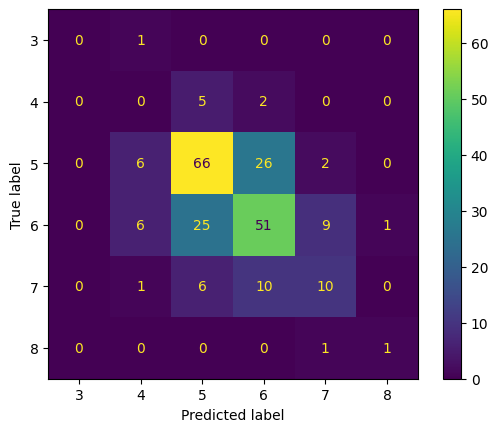

In [8]:
print("Test accuration : ", metrics.accuracy_score(y_test,y_prediksi))
ConfusionMatrixDisplay.from_predictions(y_test,y_prediksi)

Visualisasi Decision Tree

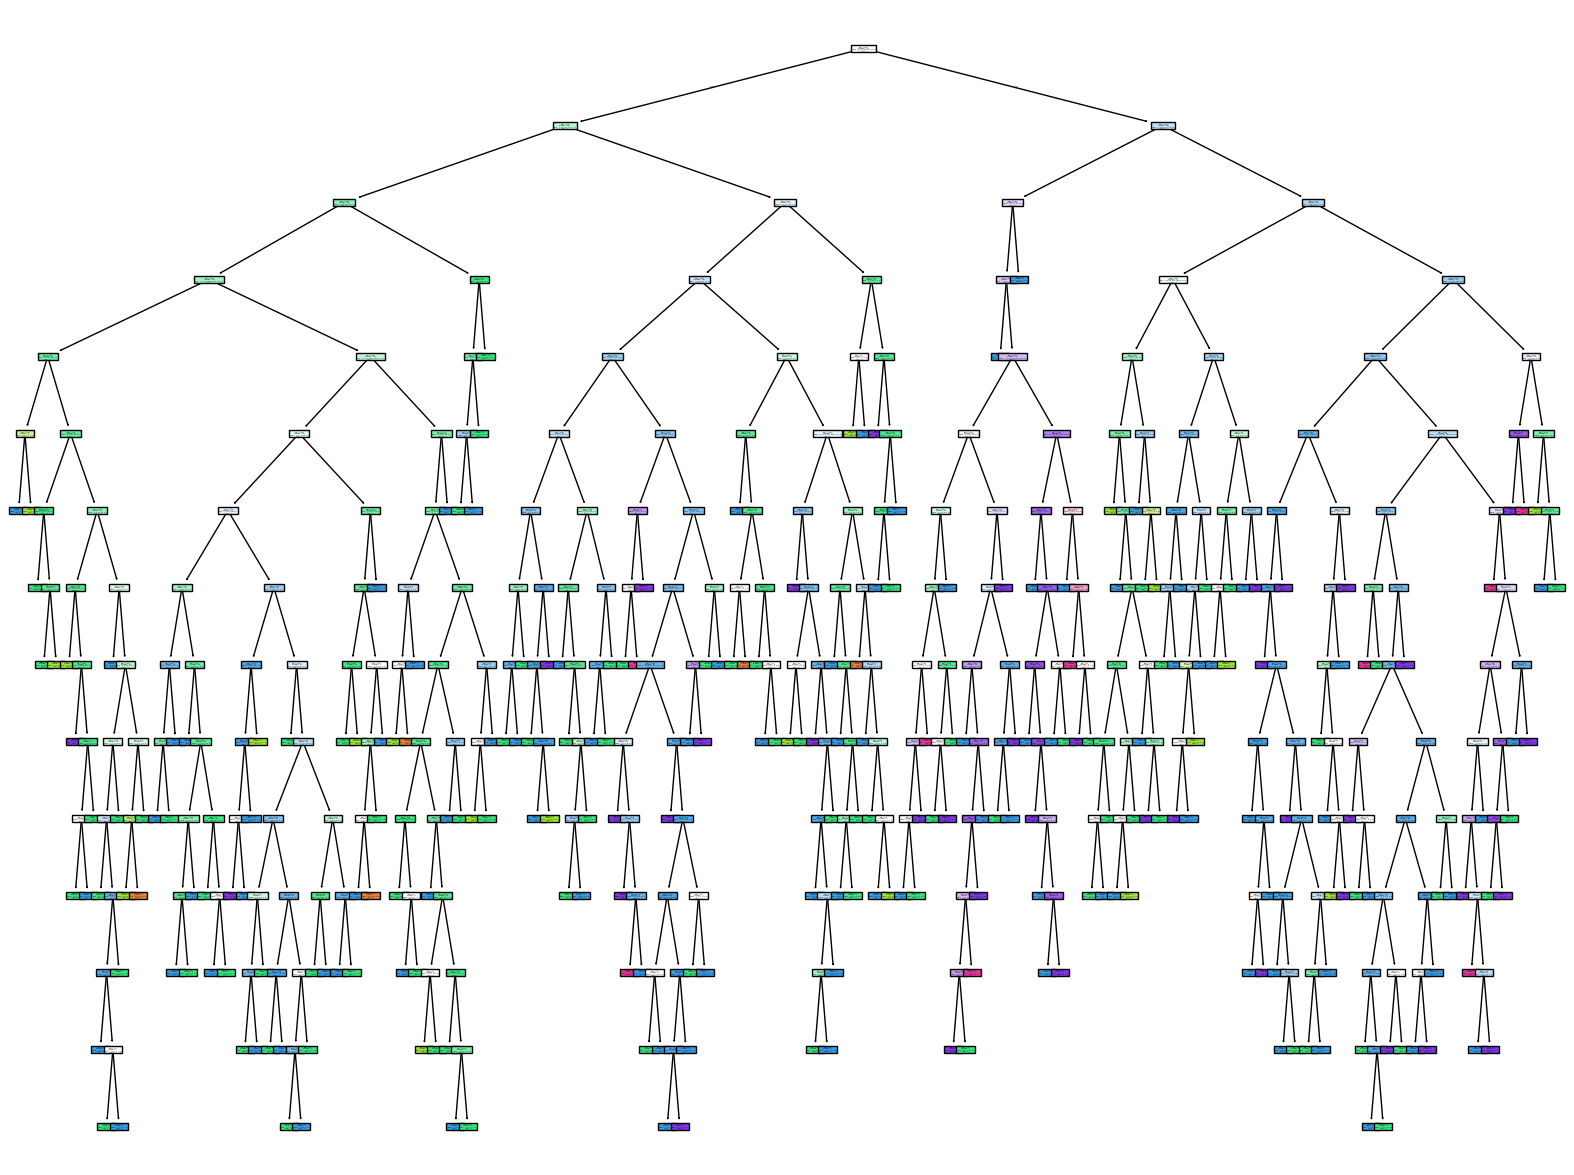

In [9]:
fn = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
cn = ['5','6','7','4','8','9']
fig = plt.figure(figsize=(20,15))
pict_tree = tree.plot_tree(tree_clf,feature_names=fn,class_names=cn,filled=True)

Save Model

In [10]:
joblib.dump(tree_clf, '../models/wine_id3.joblib')

['../models/wine_id3.joblib']

Test New Data

In [11]:
input_data = [[7.4, 0.7, 0.0, 1.9, 0.076, 15.0, 21.0, 0.997, 3.2, 0.68, 9.4]]
prediksi_data = tree_clf.predict(input_data)
print("Predict Result : ",prediksi_data)

Predict Result :  [5]
